# RANDOM FORESTS

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("verisetleri\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
# MODEL & TAHMİN

In [7]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [9]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# Birinci derecede önemli parametreler
# Kaç tane ağaç olacak? n_estimators
# Bölünmelerde göz önünde bulundurulacak değişken sayısı, max_features
# İkinci düzeyde önemli parametreler max_depth, min_samples_leaf, min_samples_split
# min_samples_split : Ağacın ne kadar dallanacağını kontrol eder. Yerine max_depth te kullanılabilir.

In [11]:
y_pred = rf_model.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.7575757575757576

In [13]:
# MODEL TUNNING

In [14]:
rf = RandomForestClassifier()

In [15]:
rf_params = {"n_estimators":[100, 200, 500, 1000], "max_features":[3,5,7,8], "min_samples_split":[2,5,10,20] }

In [16]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.4min finished


In [21]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 5, 'n_estimators': 200}

In [35]:
rf_final_model_tuned = RandomForestClassifier(max_features=5,min_samples_split=5,n_estimators=200).fit(X_train, y_train)

In [37]:
y_pred = rf_final_model_tuned.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.7489177489177489

### DEĞİŞKEN ÖNEM DÜZEYLERİ - ( ileri seviye )

In [43]:
rf_final_model_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
rf_final_model_tuned.feature_importances_

array([0.05387523, 0.34713193, 0.07234975, 0.0534474 , 0.05144549,
       0.16923228, 0.10789882, 0.1446191 ])

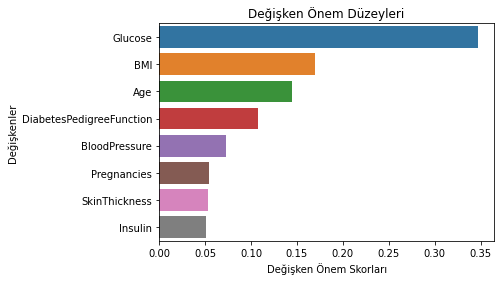

In [42]:
feature_imp = pd.Series(rf_final_model_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()